In [ ]:
# 진행중인 Competition List
#!kaggle competitions list

In [ ]:
#%cd C:\Users\cswoo\Documents\kaggle\dataset

In [ ]:
# 데이터 다운로드
#!kaggle competitions download -c santander-product-recommendation

In [ ]:
#!tar -zxvf santander-product-recommendation.zip -C "C:\Users\cswoo\Documents\kaggle\dataset"

In [ ]:
# 압축해제
#!tar -zxvf train_ver2.csv.zip -C "C:\Users\cswoo\Documents\kaggle\dataset"
#!tar -zxvf test_ver2.csv.zip -C "C:\Users\cswoo\Documents\kaggle\dataset"

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('C:/Users/cswoo/Documents/kaggle/dataset/train_ver2.csv')

C:\Users\cswoo\.conda\envs\sungwook\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## EDA(탐색적 데이터 분석)

In [3]:
# 데이터 shape
train_df.shape

(13647309, 48)

In [4]:
train_df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
# 데이터 정보(0~23:제품 변수, 24~47:고객 변수)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

### EDA - 기초 통계

In [6]:
# 고객 변수 수치형 정보 기초 통계랑
train_df.iloc[:, :24].describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


In [7]:
# 고객 변수 범주형 변수의 describe
obj_cols = [col for col in train_df.columns[:24] if train_df[col].dtype in ['O']]
train_df[obj_cols].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


In [8]:
# 범주형 변수의 고유값
for col in obj_cols:
    unique = np.unique(train_df[col].astype(str))
    print('-'*50)
    print(f"colum:{col}, n_unique:{len(unique)}\n{unique}")

--------------------------------------------------
colum:fecha_dato, n_unique:17
['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
colum:ind_empleado, n_unique:6
['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
colum:pais_residencia, n_unique:119
['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'QA' 'RO' 'RS'

--------------------------------------------------
colum:indrel_1mes, n_unique:10
['1' '1.0' '2' '2.0' '3' '3.0' '4' '4.0' 'P' 'nan']
--------------------------------------------------
colum:tiprel_1mes, n_unique:6
['A' 'I' 'N' 'P' 'R' 'nan']
--------------------------------------------------
colum:indresi, n_unique:3
['N' 'S' 'nan']
--------------------------------------------------
colum:indext, n_unique:3
['N' 'S' 'nan']
--------------------------------------------------
colum:conyuemp, n_unique:3
['N' 'S' 'nan']
--------------------------------------------------
colum:canal_entrada, n_unique:163
['004' '007' '013' '025' 'K00' 'KAA' 'KAB' 'KAC' 'KAD' 'KAE' 'KAF' 'KAG'
 'KAH' 'KAI' 'KAJ' 'KAK' 'KAL' 'KAM' 'KAN' 'KAO' 'KAP' 'KAQ' 'KAR' 'KAS'
 'KAT' 'KAU' 'KAV' 'KAW' 'KAY' 'KAZ' 'KBB' 'KBD' 'KBE' 'KBF' 'KBG' 'KBH'
 'KBJ' 'KBL' 'KBM' 'KBN' 'KBO' 'KBP' 'KBQ' 'KBR' 'KBS' 'KBU' 'KBV' 'KBW'
 'KBX' 'KBY' 'KBZ' 'KCA' 'KCB' 'KCC' 'KCD' 'KCE' 'KCF' 'KCG' 'KCH' 'KCI'
 'KCJ' 'KCK' 'KCL' 'KCM' 'KC

### EDA - 시각화

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 시계열성 x

In [10]:
train_df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


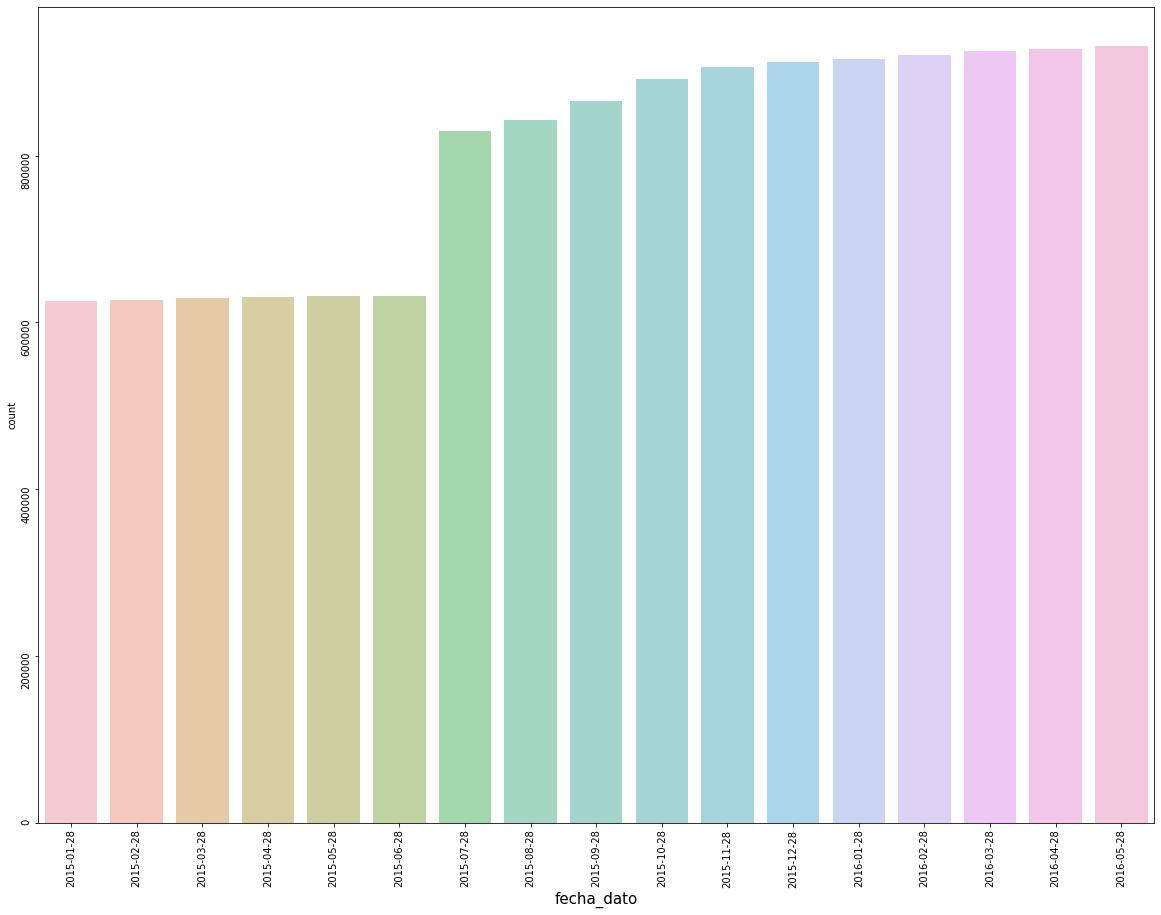

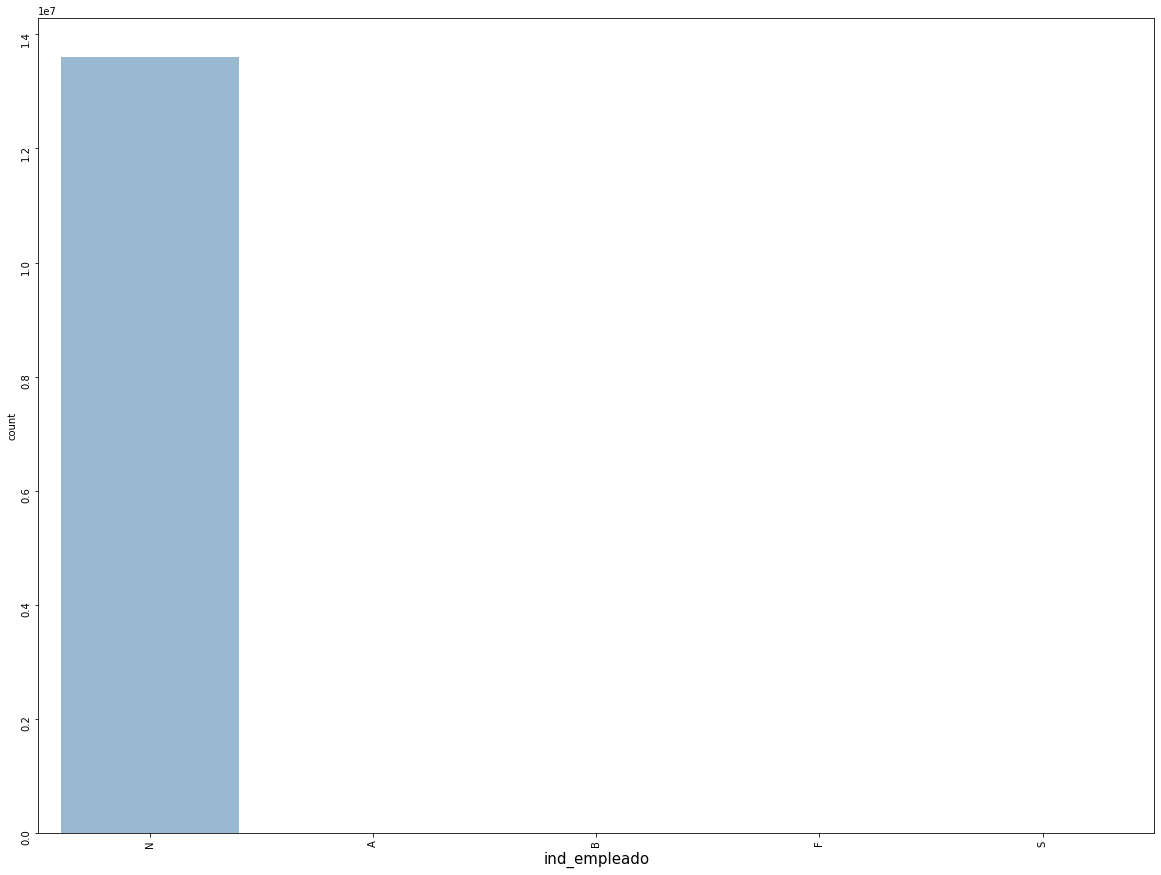

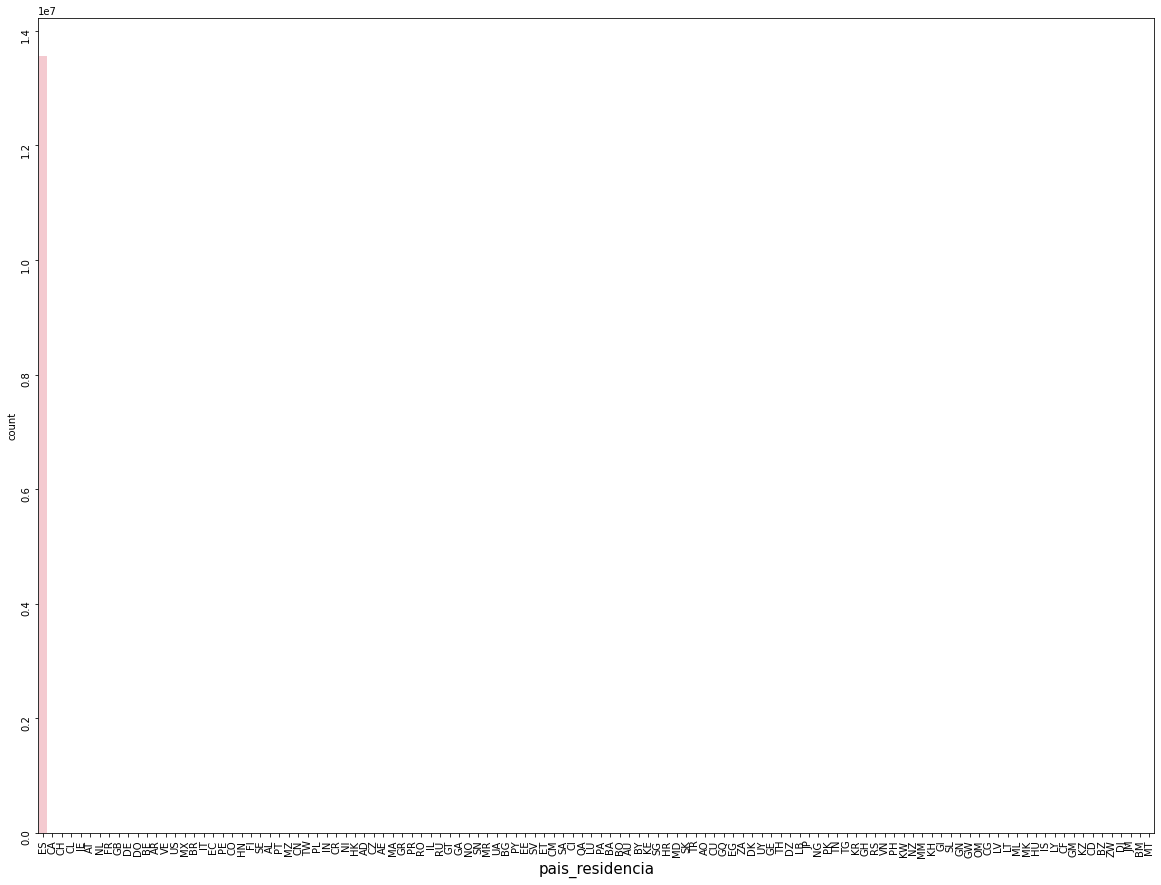

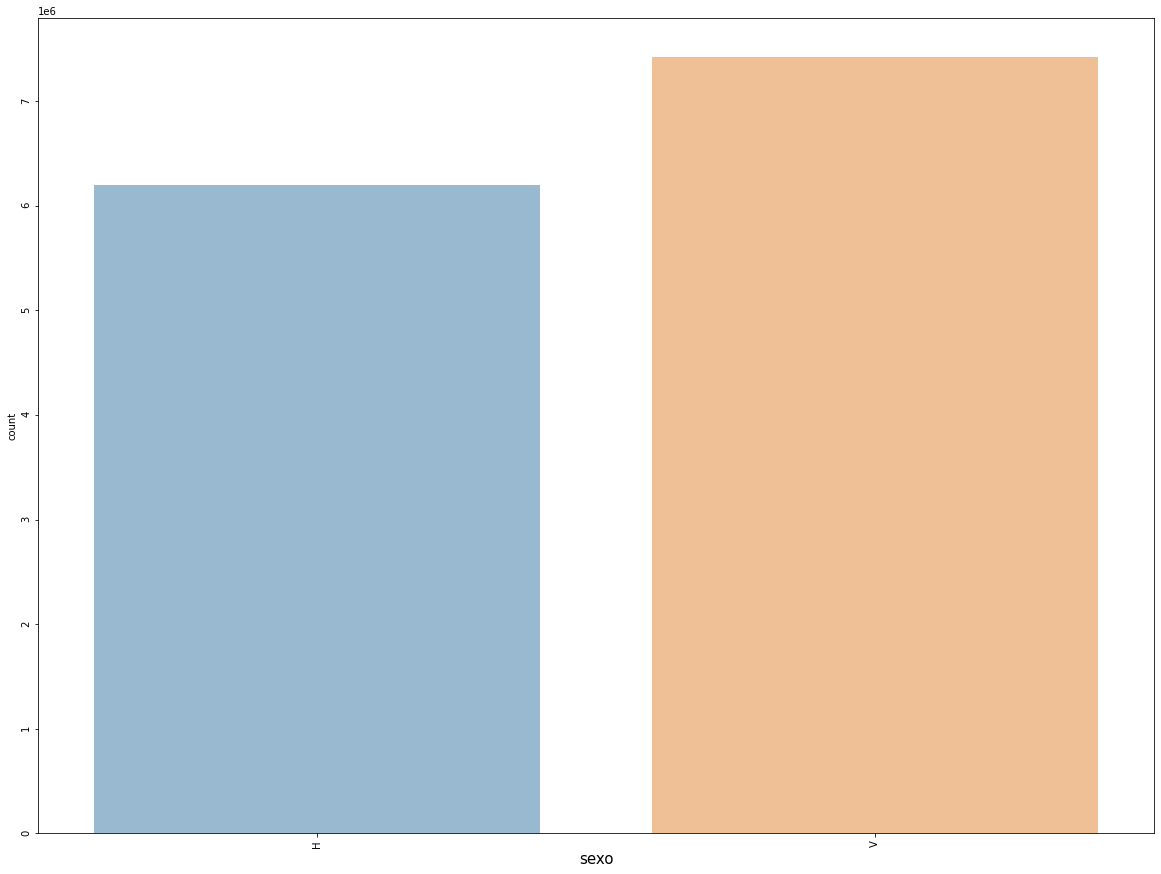

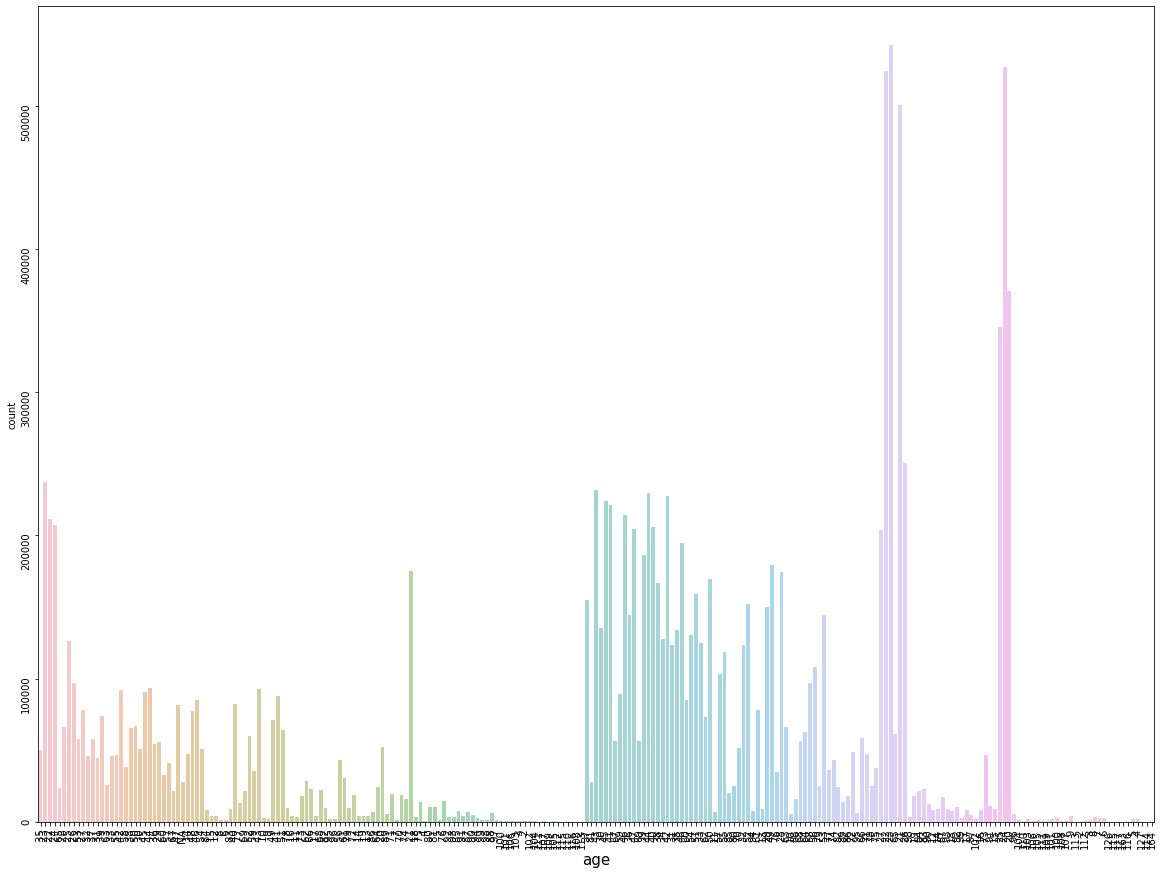

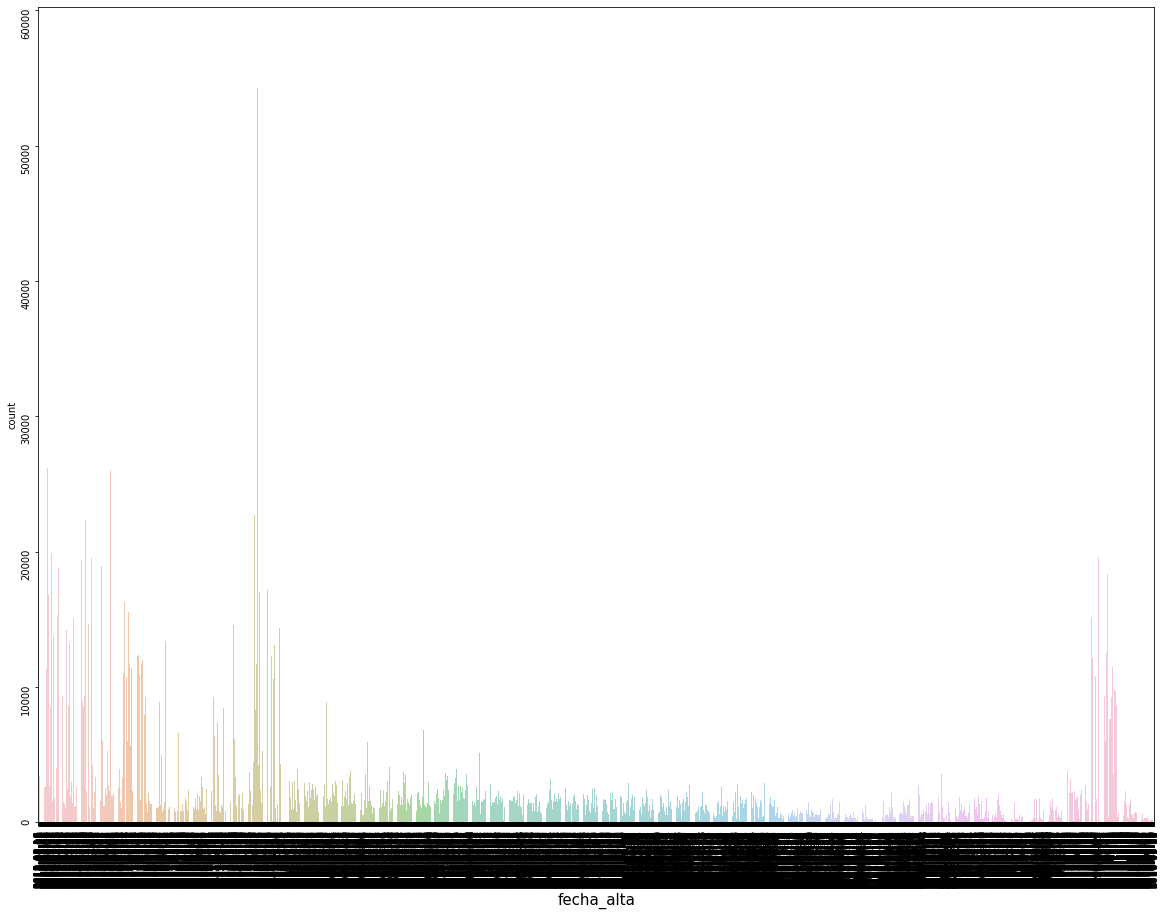

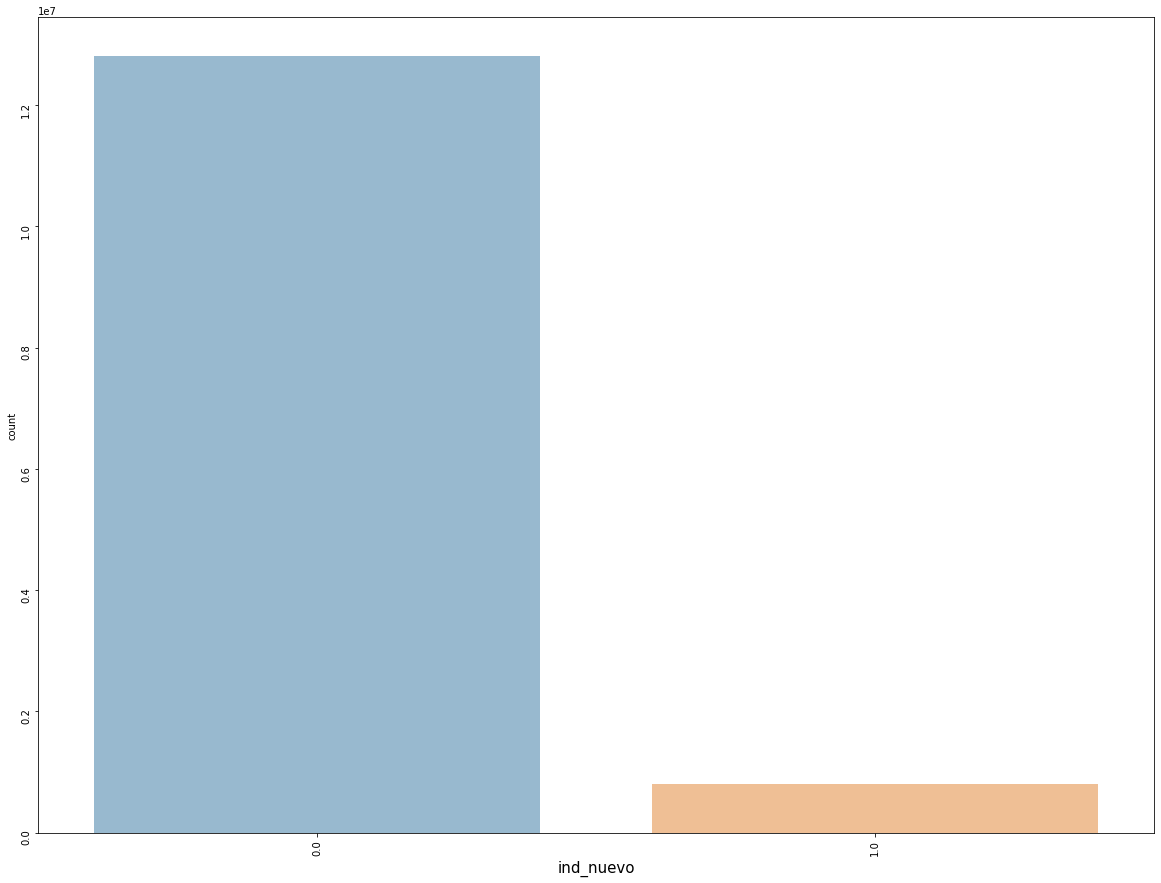

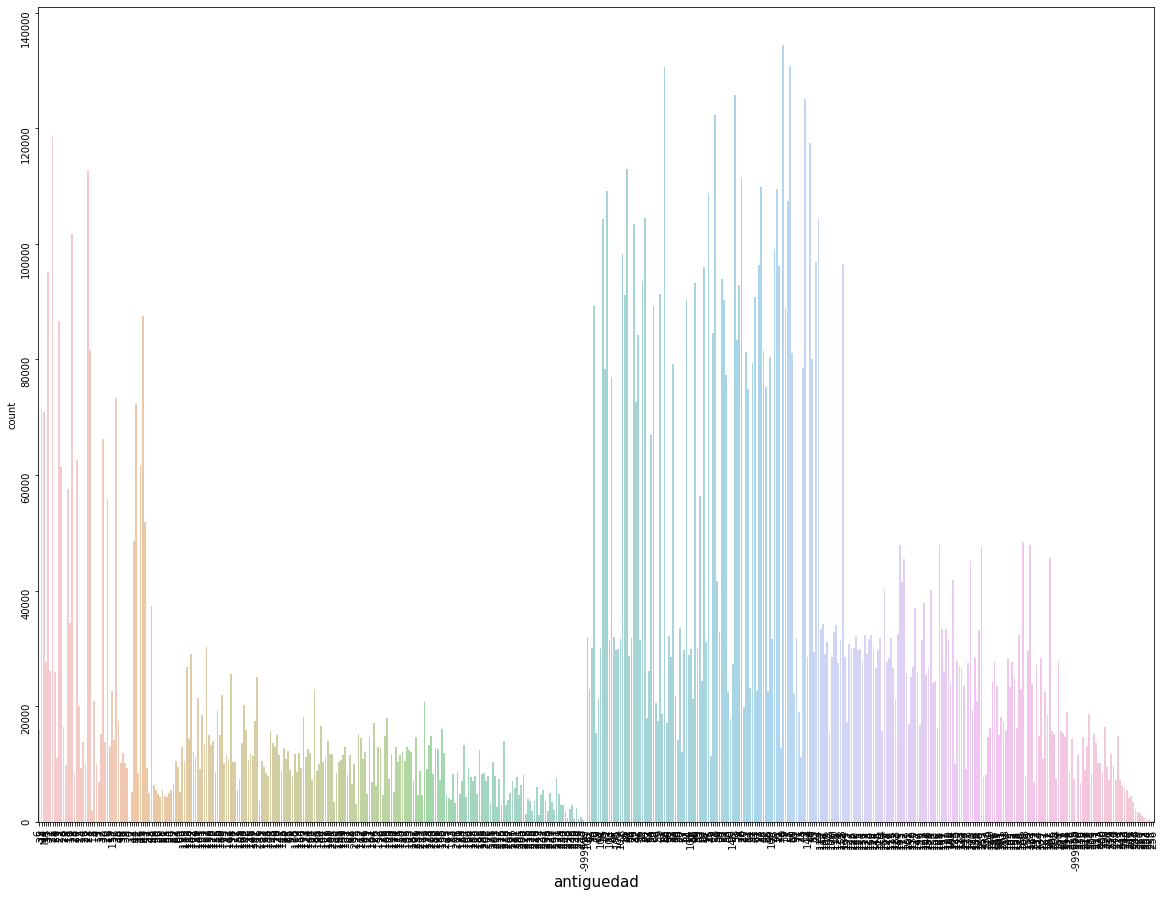

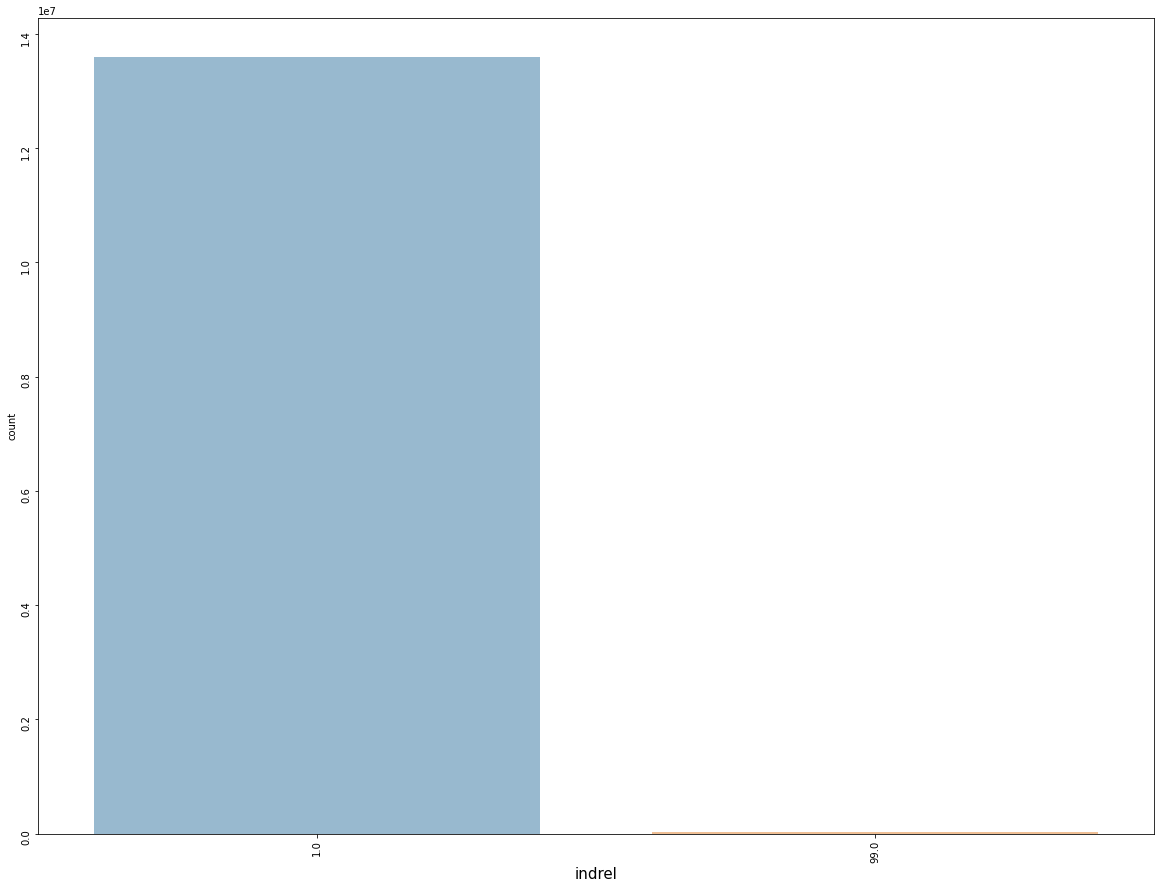

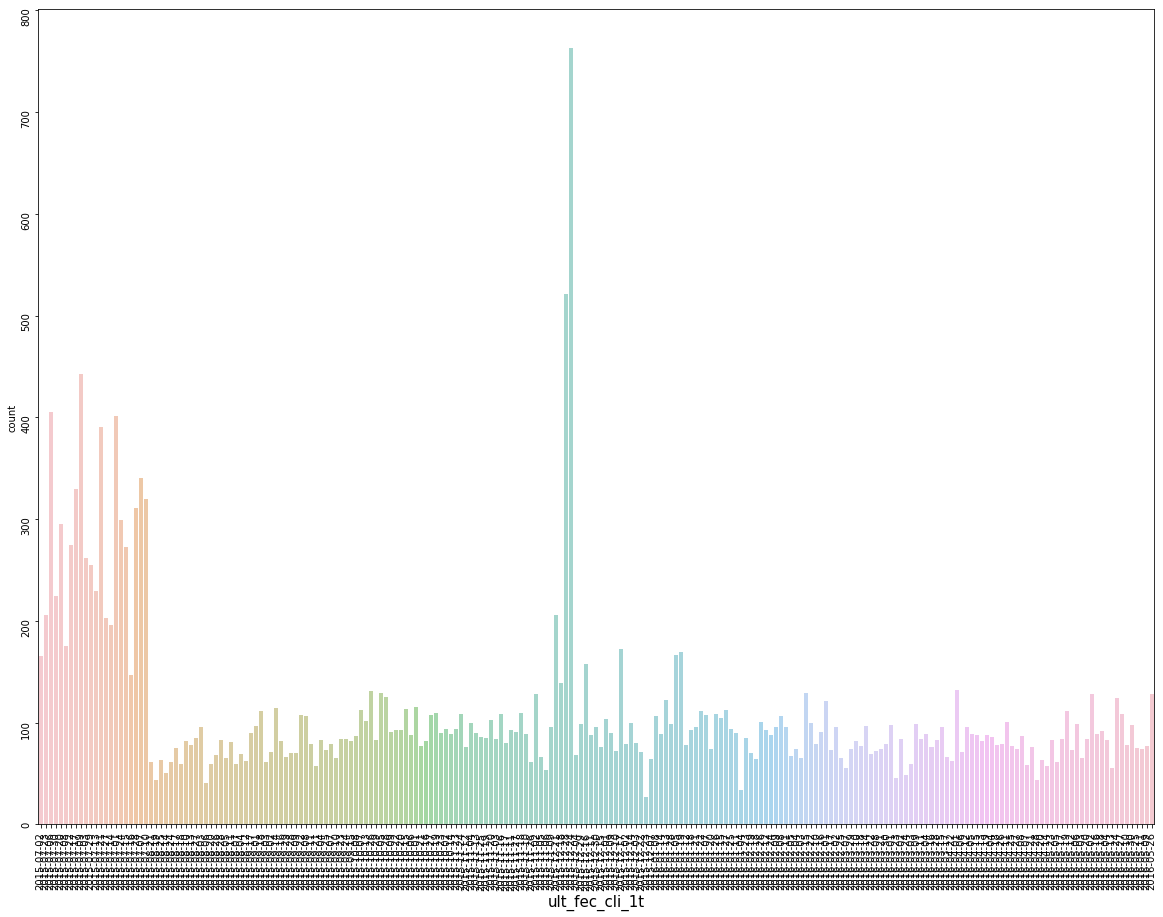

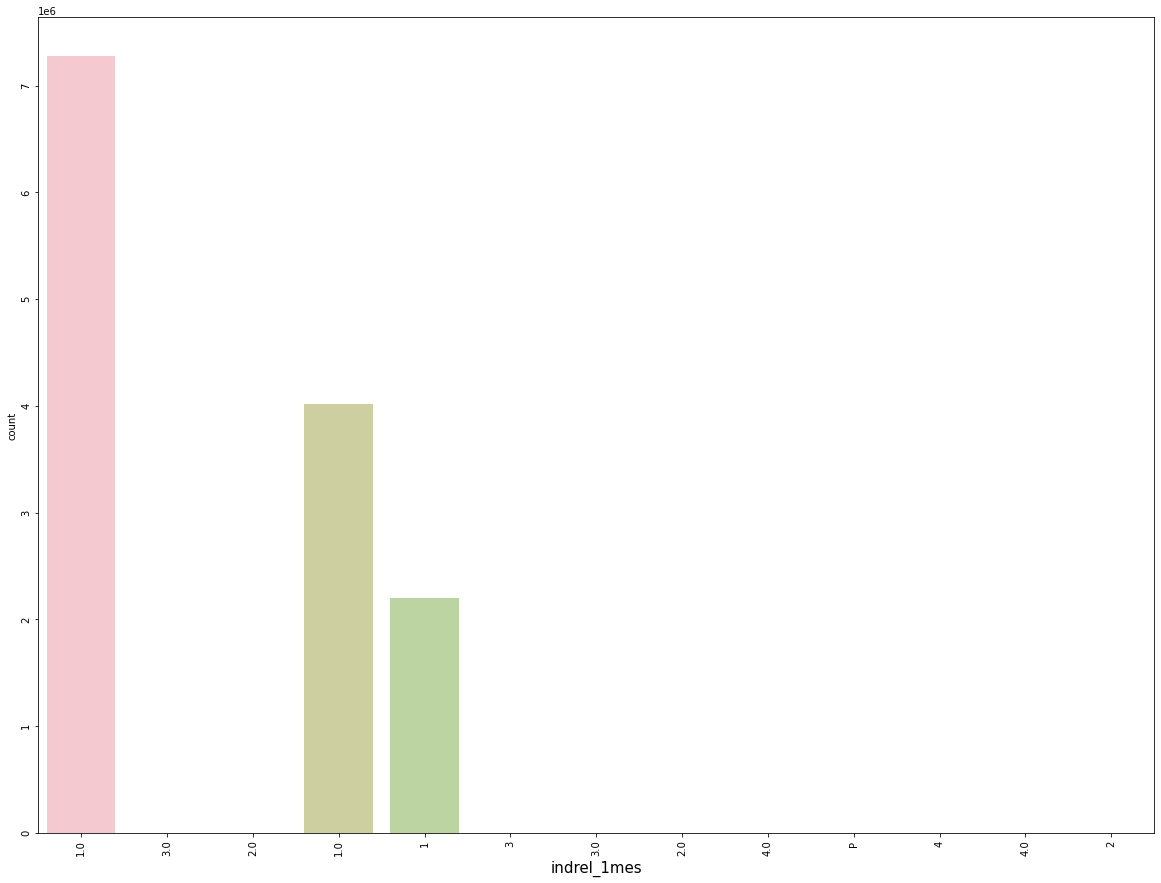

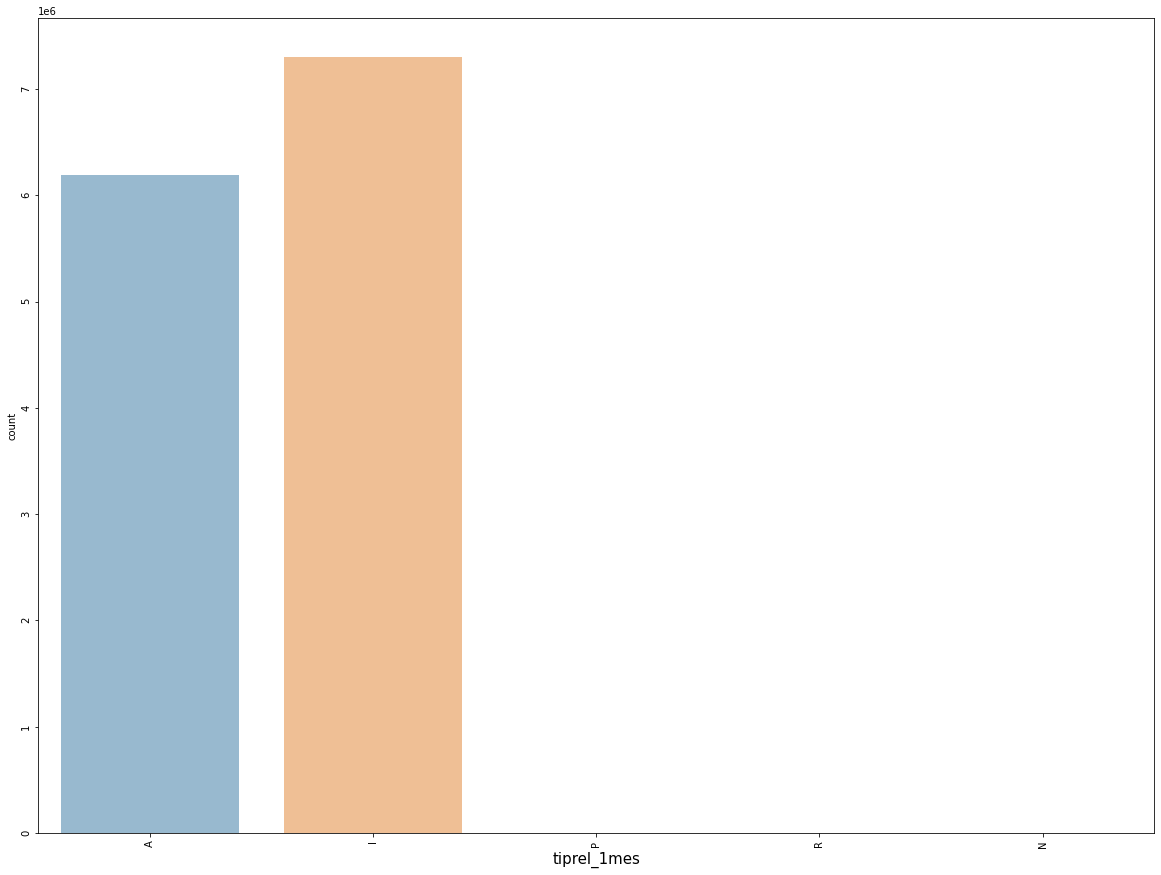

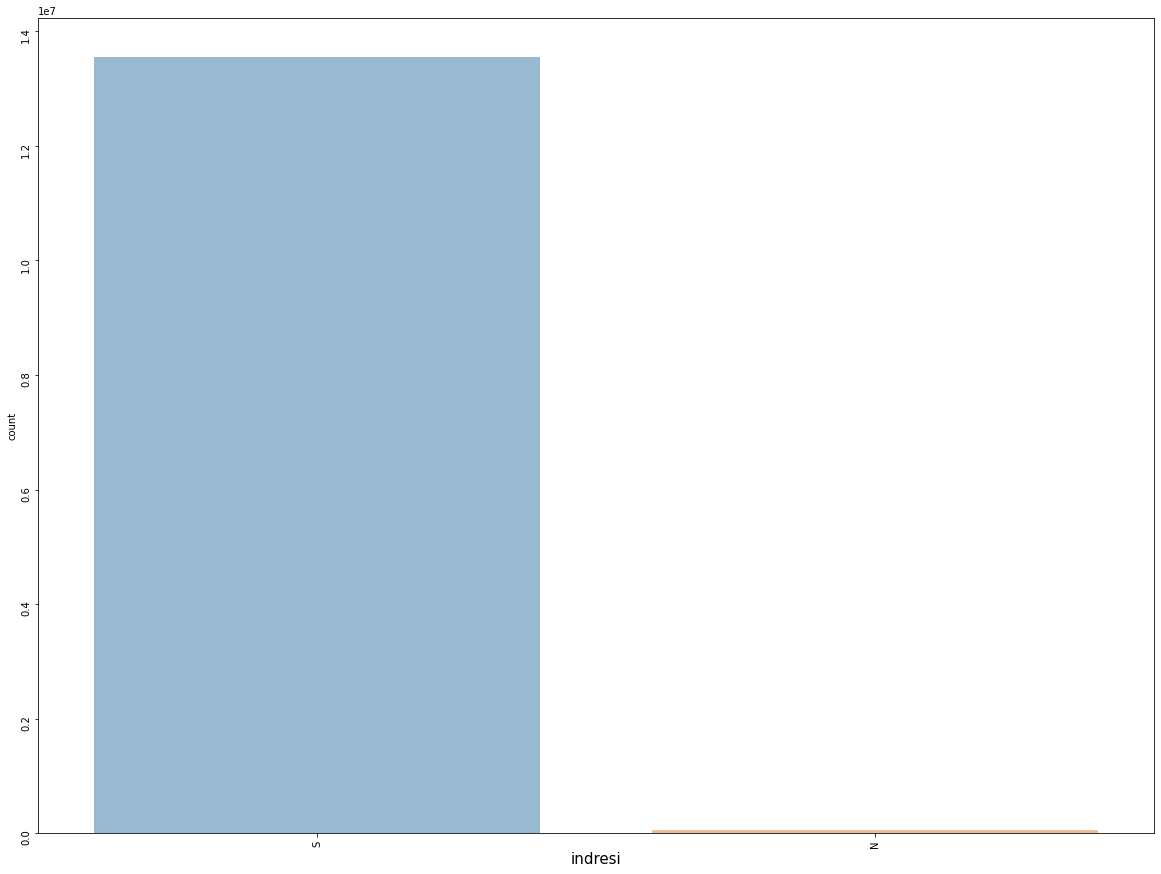

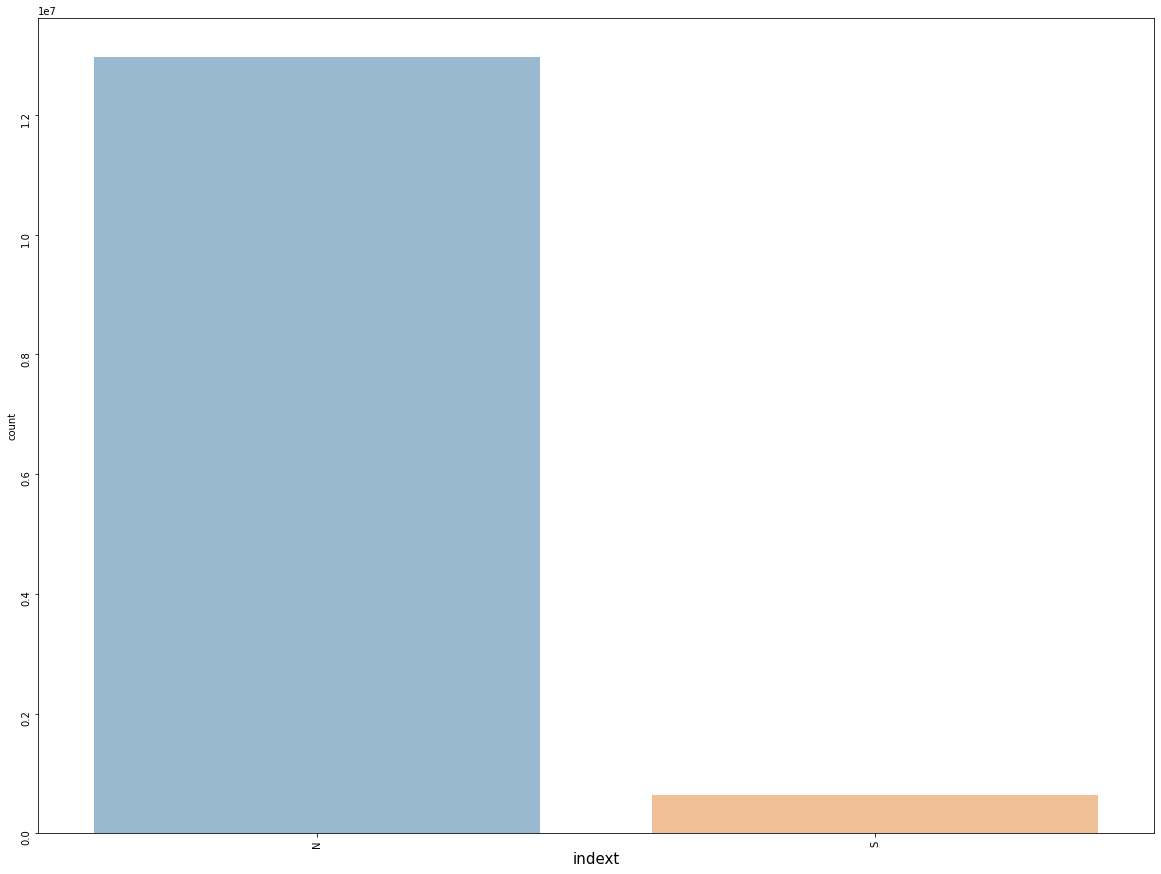

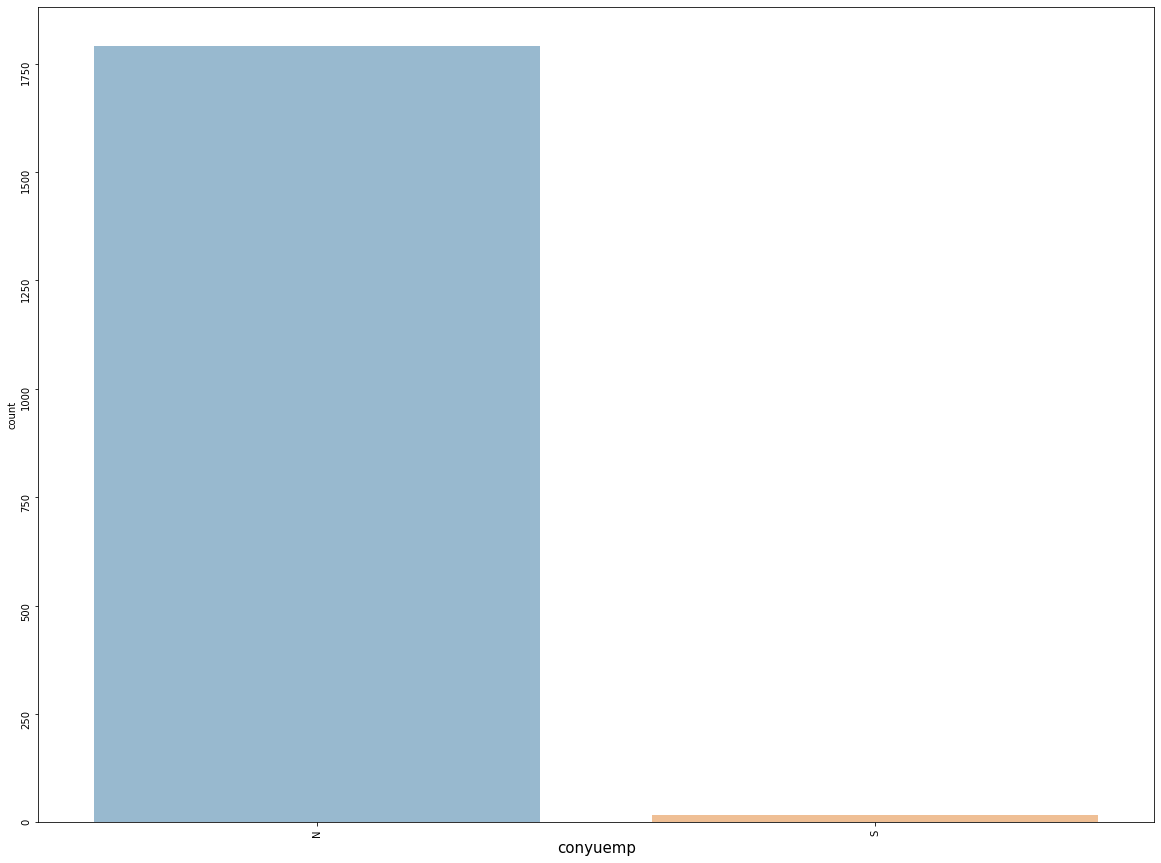

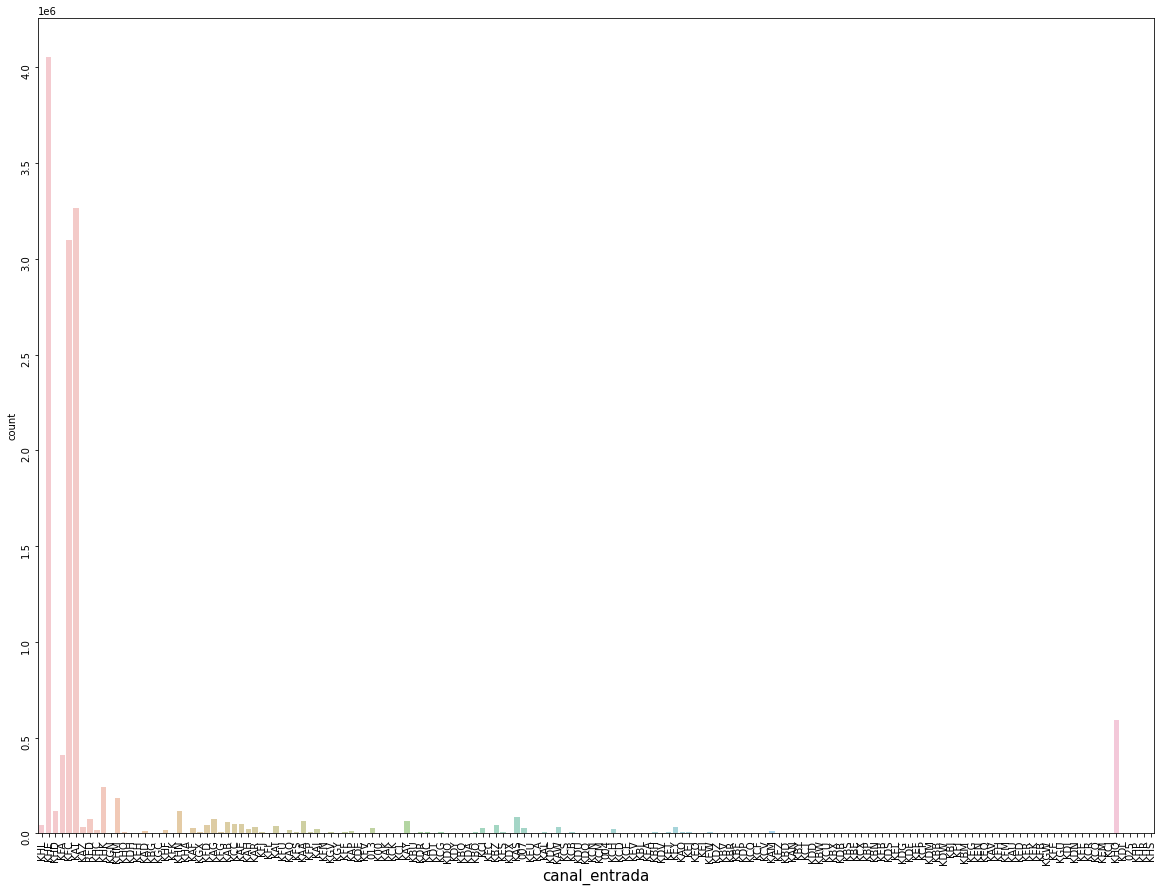

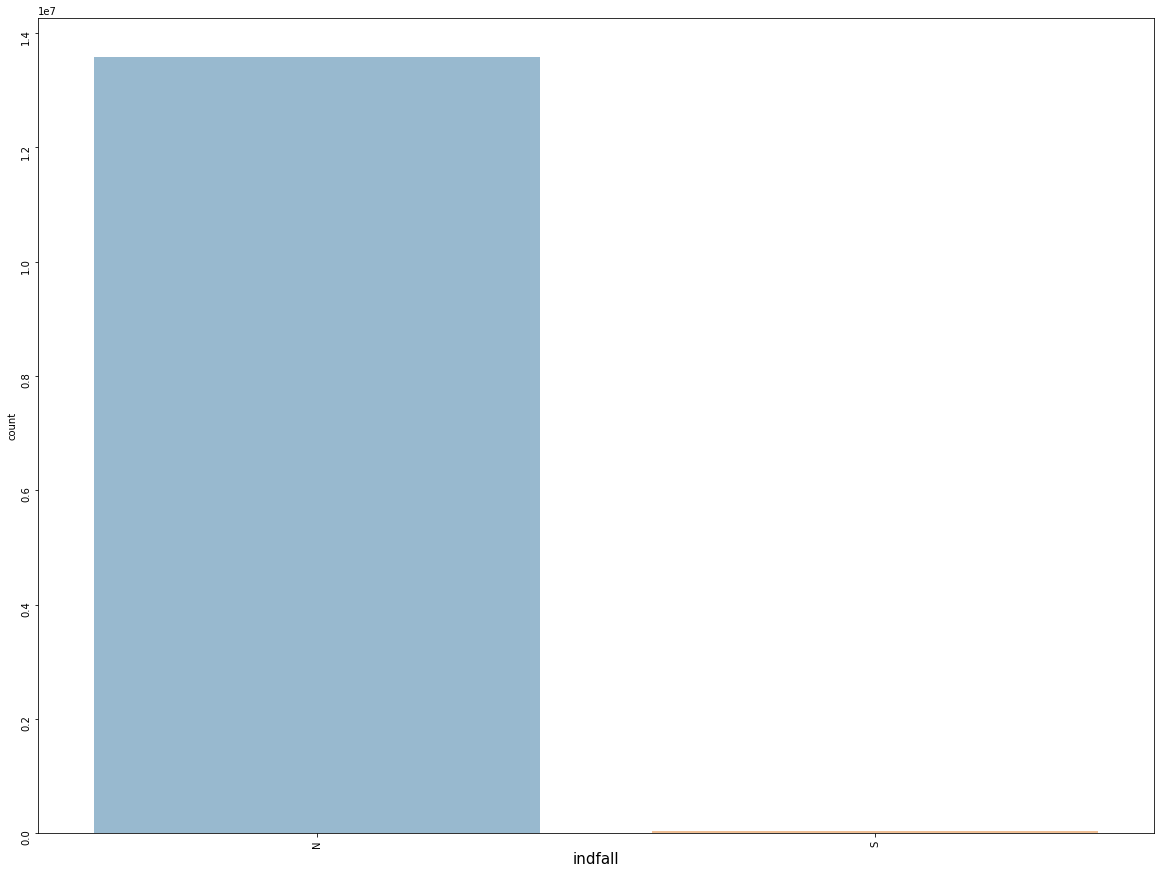

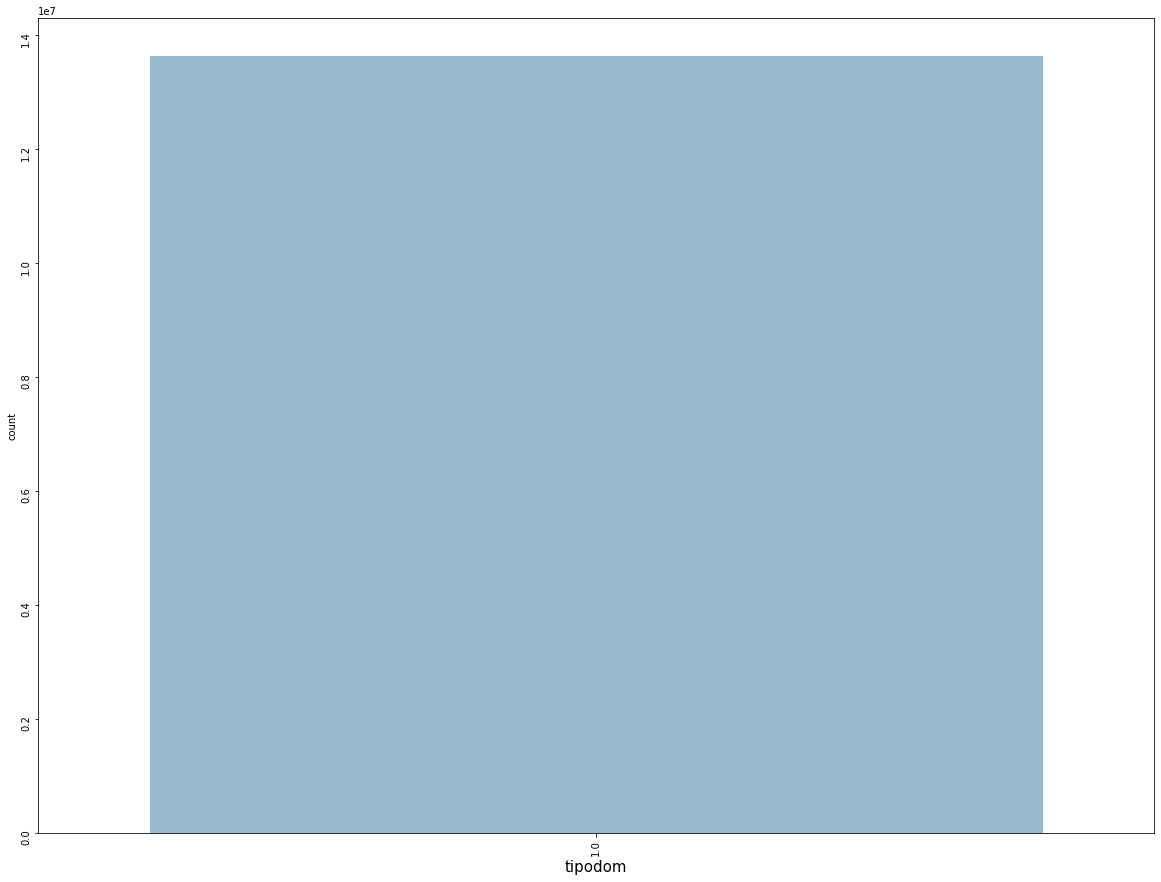

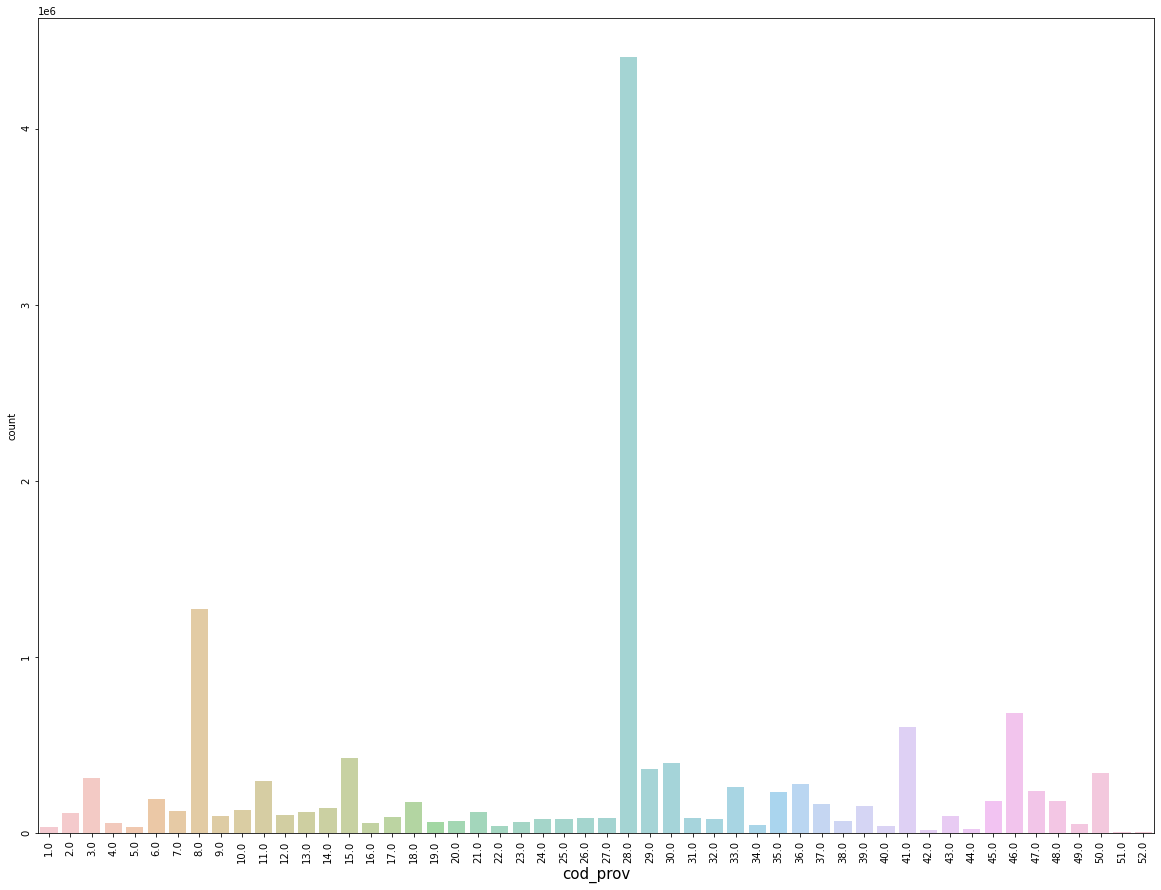

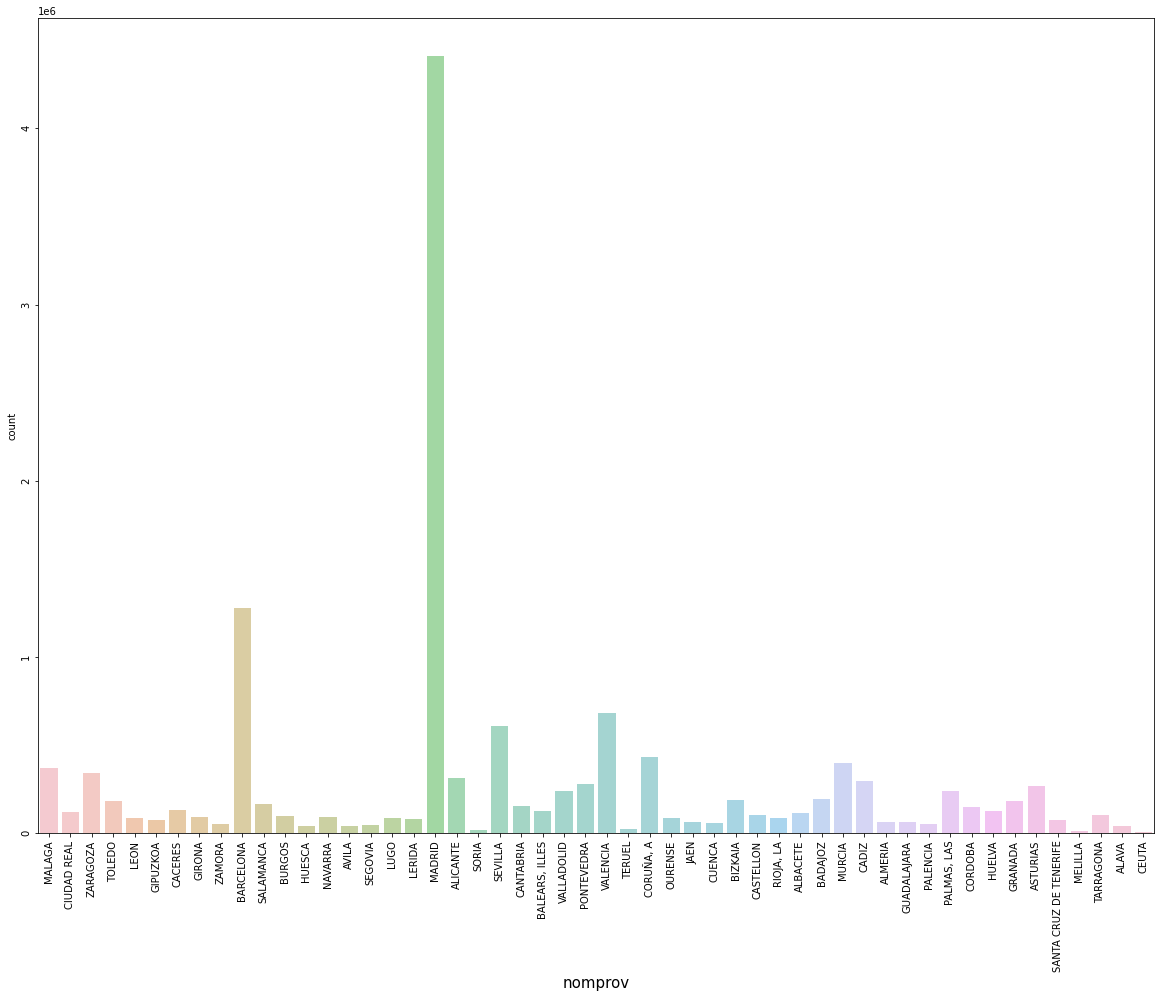

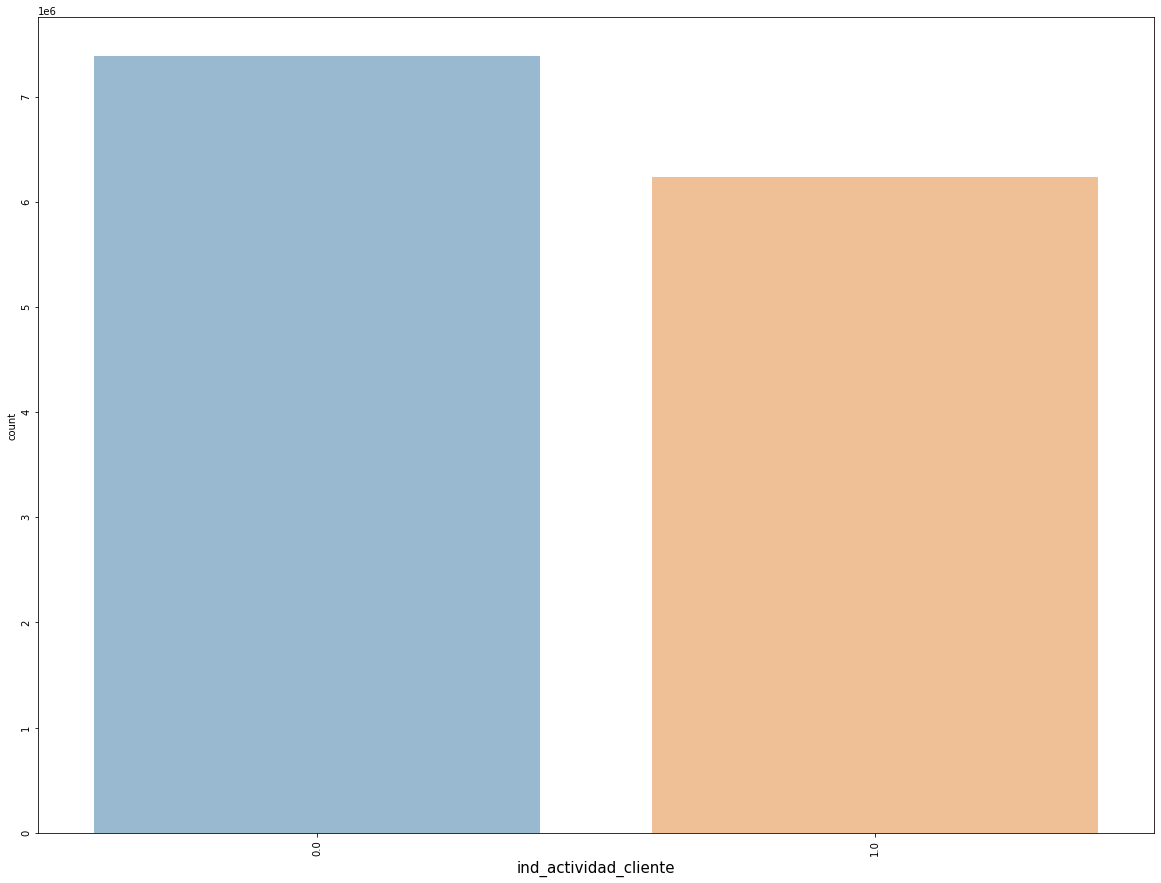

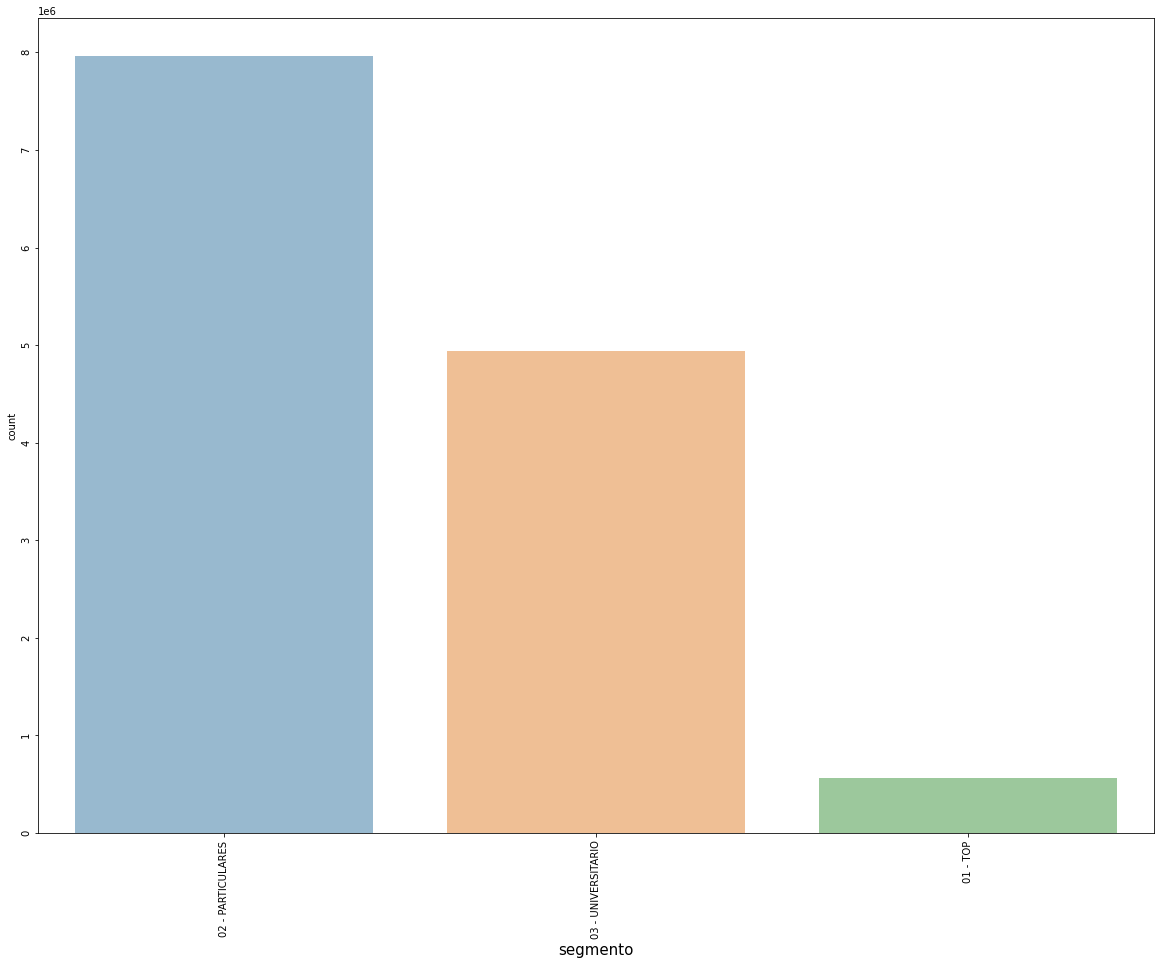

In [11]:
skip_cols = ['ncodpers', 'renta'] # 시각화에 너무 많은 시간이 소요
for col in train_df.columns[:24]:
    if col in skip_cols:
        continue
    
    fig, ax = plt.subplots(figsize=(20, 15))
    ax = sns.countplot(x=col, data=train_df, alpha=0.5)
    ax.set_xlabel(f"{col}", fontsize=15)
    ax.tick_params(rotation=90)
    plt.show()

#### 시계열성 추가
- 시계열 데이터 시각화(시계열 데이터를 올바르게 분석하려면 시각화 및 데이터 살펴보기 과정에서도 시간에 따른 변화 척도를 눈에 볼 수 있도록 분석해야 한다.)


In [12]:
month = train_df['fecha_dato'].unique().tolist()
label_cols = train_df.columns[24:].tolist() # 제품 변수 컬럼

In [13]:
label_over_time = []
for label_col in label_cols:
    label_sum = train_df.groupby(['fecha_dato'])[label_col].agg('sum').tolist()
    label_over_time.append(label_sum)
label_over_time = np.array(label_over_time)

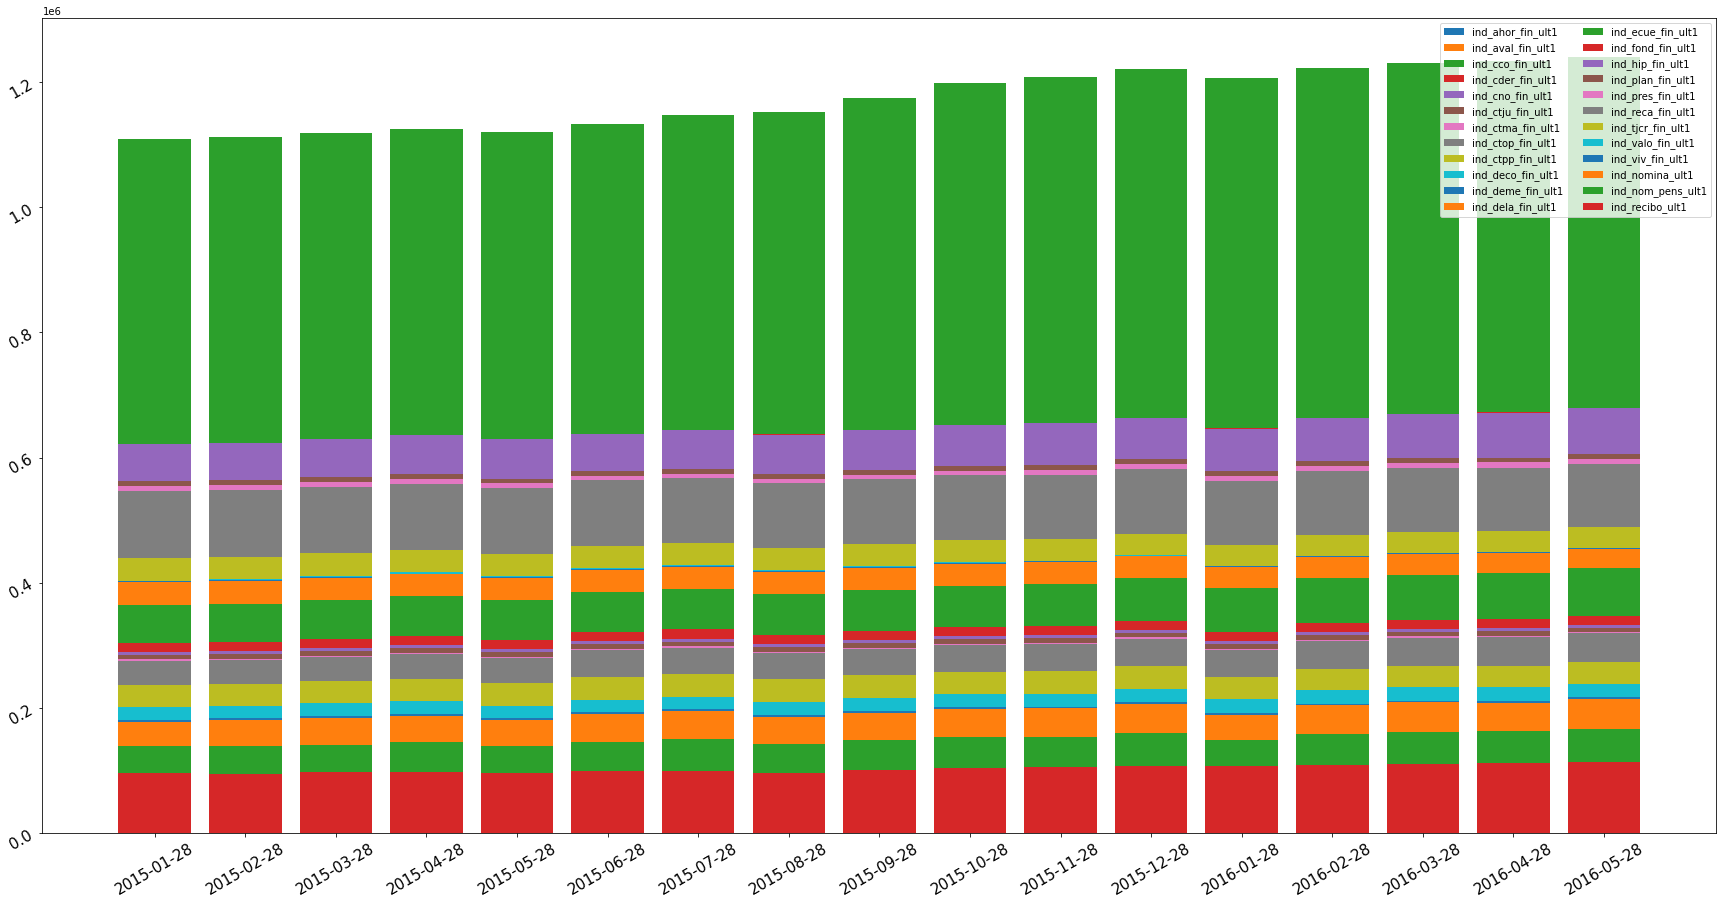

In [14]:
# 월별 제품 보유량
fig, ax = plt.subplots(figsize=(30, 15))
ax.set_xticks(range(len(month)))
ax.set_xticklabels(month)
ax.tick_params(labelsize=15, rotation=30)
for i in range(len(label_cols)):
    ax.bar(range(len(month)), label_over_time[i:].sum(axis=0), label=label_cols[i])
ax.legend(fontsize=10, loc='upper right', ncol=2)
plt.show()

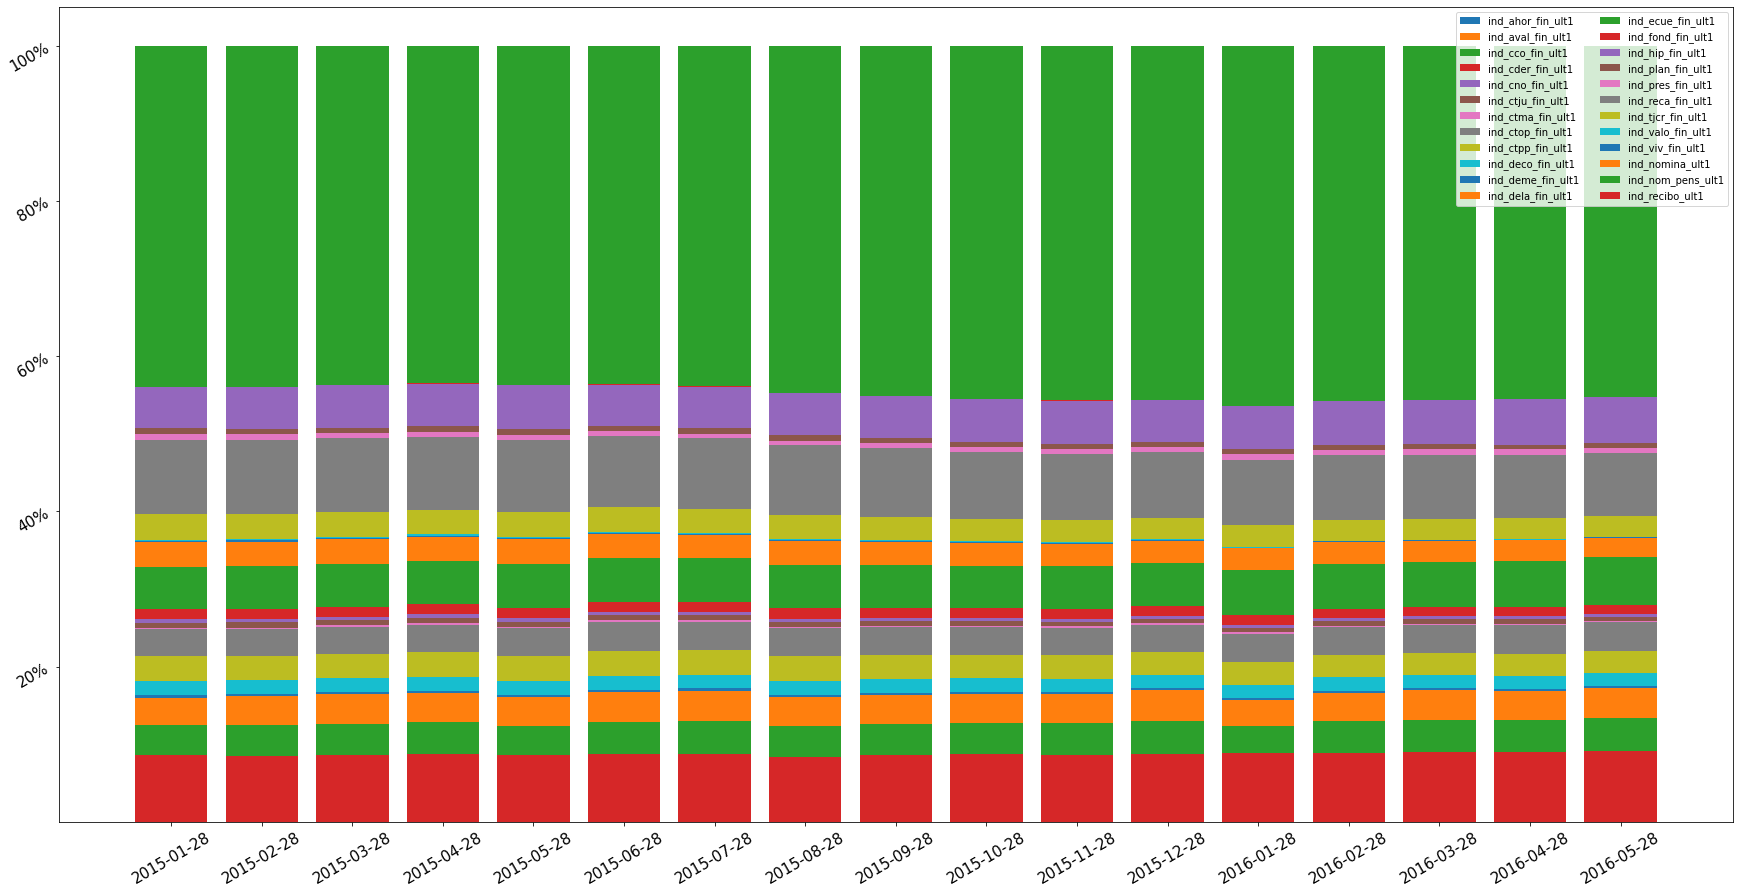

In [15]:
# 월별 보유제품 상대값
total_sum = np.array(label_over_time)[0:].sum(axis=0)
fig, ax = plt.subplots(figsize=(30, 15))
ax.set_xticks(range(len(month)))
ax.set_xticklabels(month)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])
ax.tick_params(labelsize=15, rotation=30)
for i in range(len(label_cols)):
    ax.bar(range(len(month)), np.array(label_over_time)[i:].sum(axis=0)/total_sum*100, label=label_cols[i])
ax.legend(fontsize=10, loc='upper right', ncol=2)
plt.show()

#### 신규 구매 데이터 생성 & 시각화

In [16]:
# 제품변수 컬럼
prods = train_df.columns[24:].tolist()

In [17]:
# 날짜를 숫자로 변환하는 함수
def date_to_int(date):
    Y, M, D = date.strip().split('-')
    int_date = (int(Y)-2015)*12+int(M)
    return int_date

In [18]:
# 날짜를 숫자로 변환
train_df['int_date'] = train_df['fecha_dato'].map(date_to_int)

In [19]:
train_df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,int_date
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0.0,0.0,0,17
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0.0,0.0,0,17
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0.0,0.0,0,17
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0.0,0.0,0,17


In [20]:
# 데이터를 복사하고, int_date 날짜에 1을 더하여 lag데이터 생성. 변수명에 _prev를 추가.
train_df_lag = train_df.copy()
train_df_lag['int_date'] += 1
train_df_lag.columns = [col+'_prev' if col not in ['ncodpers', 'int_date'] else col for col in train_df_lag.columns]

In [21]:
train_df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,int_date
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0.0,0.0,0,17
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0.0,0.0,0,17
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0.0,0.0,0,17
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0.0,0.0,0,17


In [22]:
train_df_lag

,fecha_dato_prev,ncodpers,ind_empleado_prev,pais_residencia_prev,sexo_prev,age_prev,fecha_alta_prev,ind_nuevo_prev,antiguedad_prev,indrel_prev,...,ind_plan_fin_ult1_prev,ind_pres_fin_ult1_prev,ind_reca_fin_ult1_prev,ind_tjcr_fin_ult1_prev,ind_valo_fin_ult1_prev,ind_viv_fin_ult1_prev,ind_nomina_ult1_prev,ind_nom_pens_ult1_prev,ind_recibo_ult1_prev,int_date
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0.0,0.0,0,18
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0.0,0.0,0,18
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0.0,0.0,0,18
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0.0,0.0,0,18


In [23]:
trn_df = train_df.merge(train_df_lag, on=['ncodpers', 'int_date'], how='left')

In [24]:
# 메모리 효율을 위해 불필요한 변수를 메모리에서 제거
del train_df, train_df_lag

In [25]:
trn_df

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1_prev,ind_plan_fin_ult1_prev,ind_pres_fin_ult1_prev,ind_reca_fin_ult1_prev,ind_tjcr_fin_ult1_prev,ind_valo_fin_ult1_prev,ind_viv_fin_ult1_prev,ind_nomina_ult1_prev,ind_nom_pens_ult1_prev,ind_recibo_ult1_prev
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
trn_df[['fecha_dato', 'int_date', 'fecha_dato_prev']]

,fecha_dato,int_date,fecha_dato_prev
0,2015-01-28,1,NaN
1,2015-01-28,1,NaN
2,2015-01-28,1,NaN
3,2015-01-28,1,NaN
4,2015-01-28,1,NaN
...,...,...,...
13647304,2016-05-28,17,2016-04-28
13647305,2016-05-28,17,2016-04-28
13647306,2016-05-28,17,2016-04-28
13647307,2016-05-28,17,2016-04-28


In [28]:
# 저번 달의 제품 정보가 존재하지 않을 경우를 0으로 대체
for prod in prods:
    prev = prod + '_prev'
    trn_df[prev] = trn_df[prev].fillna(0)

In [40]:
# 신규 구매 변수 padd를 생성
add_cols = []# 신규 구매 변수
for prod in prods:
    padd = prod + '_add'
    add_cols.append(padd)
    prev = prod + '_prev'
    trn_df[padd] = ((trn_df[prod] == 1) & (trn_df[prev] == 0)).astype(np.int8)

In [43]:
# 신규 구매 변수만을 추출하여 labels에 저장
labels = trn_df[add_cols]
labels.columns = prods
labels.to_csv('C:/Users/cswoo/Documents/kaggle/dataset/labels.csv', index=False)

In [45]:
labels = pd.read_csv('C:/Users/cswoo/Documents/kaggle/dataset/labels.csv')
fecha_dato = pd.read_csv('C:/Users/cswoo/Documents/kaggle/dataset/train_ver2.csv', usecols=['fecha_dato'])

In [49]:
fecha_dato

,fecha_dato
0,2015-01-28
1,2015-01-28
2,2015-01-28
3,2015-01-28
4,2015-01-28
...,...
13647304,2016-05-28
13647305,2016-05-28
13647306,2016-05-28
13647307,2016-05-28


In [60]:
labels['date'] = fecha_dato['fecha_dato']
months = np.unique(fecha_dato['fecha_dato']).tolist()
label_cols = labels.columns[:24].tolist()

In [62]:
labels

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,date
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2015-01-28
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2015-01-28
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2015-01-28
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2015-01-28
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2015-01-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-05-28
13647305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-05-28
13647306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-05-28
13647307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-05-28


In [67]:
label_over_time = []
for label_col in label_cols:
    label_over_time.append(labels.groupby(['date'])[label_col].agg('sum').tolist())

In [72]:
label_over_time = np.array(label_over_time)
label_over_time.shape

(24, 17)

In [73]:
months

['2015-01-28',
 '2015-02-28',
 '2015-03-28',
 '2015-04-28',
 '2015-05-28',
 '2015-06-28',
 '2015-07-28',
 '2015-08-28',
 '2015-09-28',
 '2015-10-28',
 '2015-11-28',
 '2015-12-28',
 '2016-01-28',
 '2016-02-28',
 '2016-03-28',
 '2016-04-28',
 '2016-05-28']

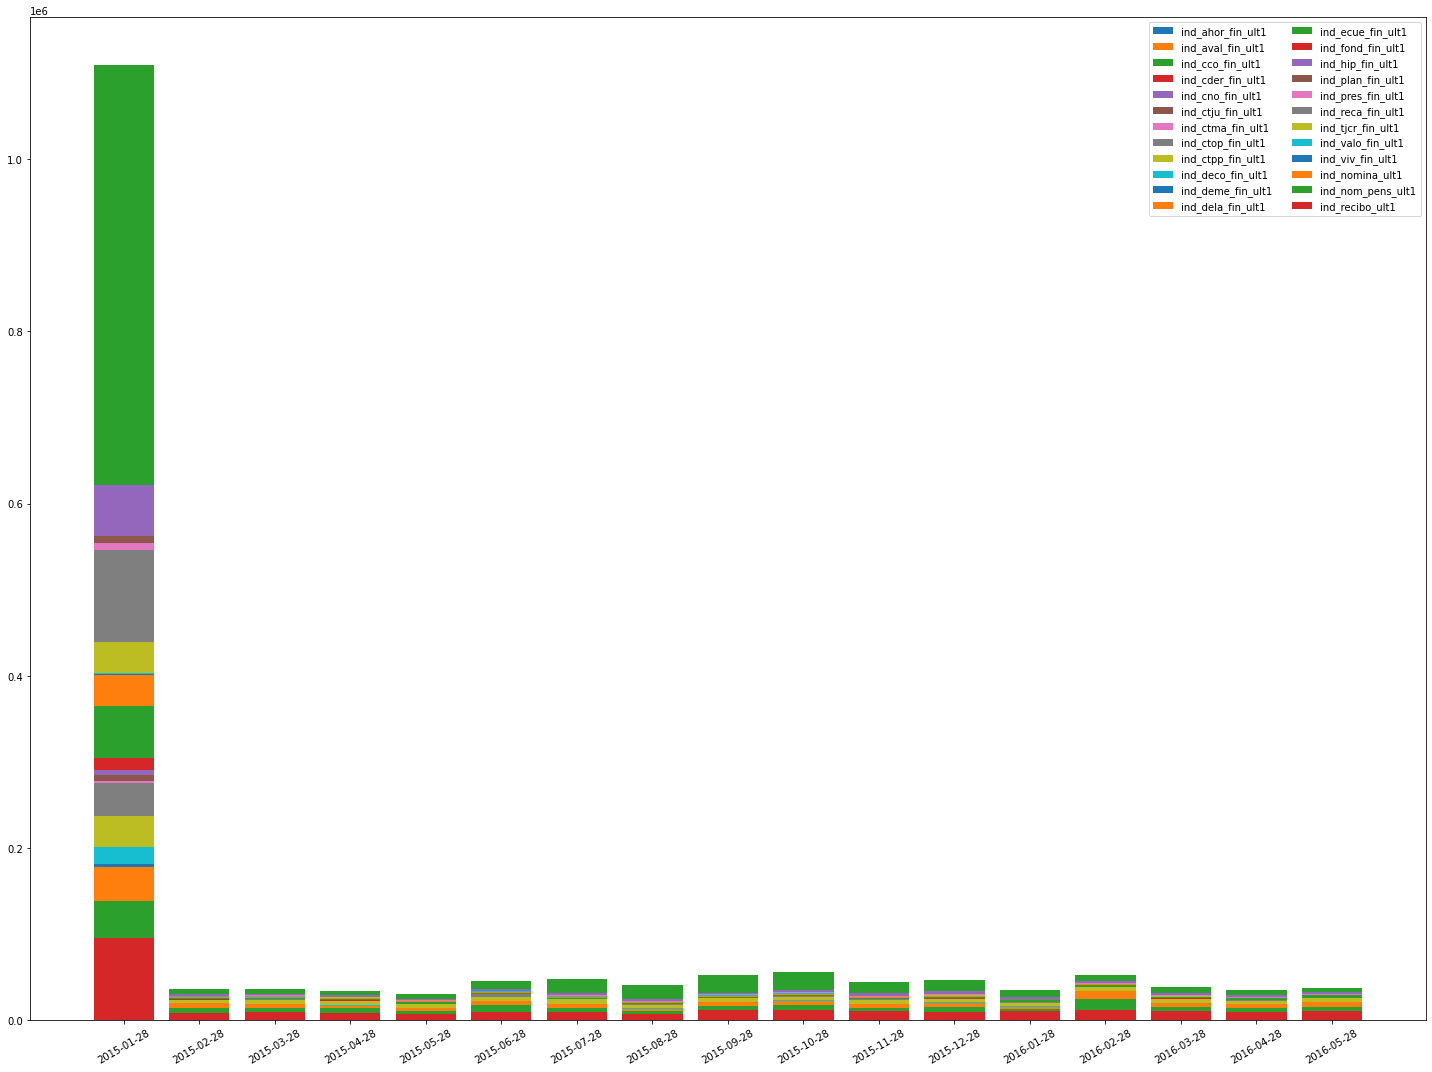

In [79]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xticks(range(len(months)))
ax.set_xticklabels(months)
ax.tick_params(axis='x', rotation=30)
for i in range(len(label_over_time)):
    ax.bar(range(len(months)), label_over_time[i:].sum(axis=0), label=label_cols[i])
fig.tight_layout()
ax.legend(fontsize=10, loc='upper right', ncol=2)
plt.show()

In [84]:
total_label_over_time

array([1109367,   36218,   36466,   34421,   30417,   45679,   47316,
         40886,   52200,   56476,   44231,   46164,   35393,   52203,
         38312,   35229,   37897])

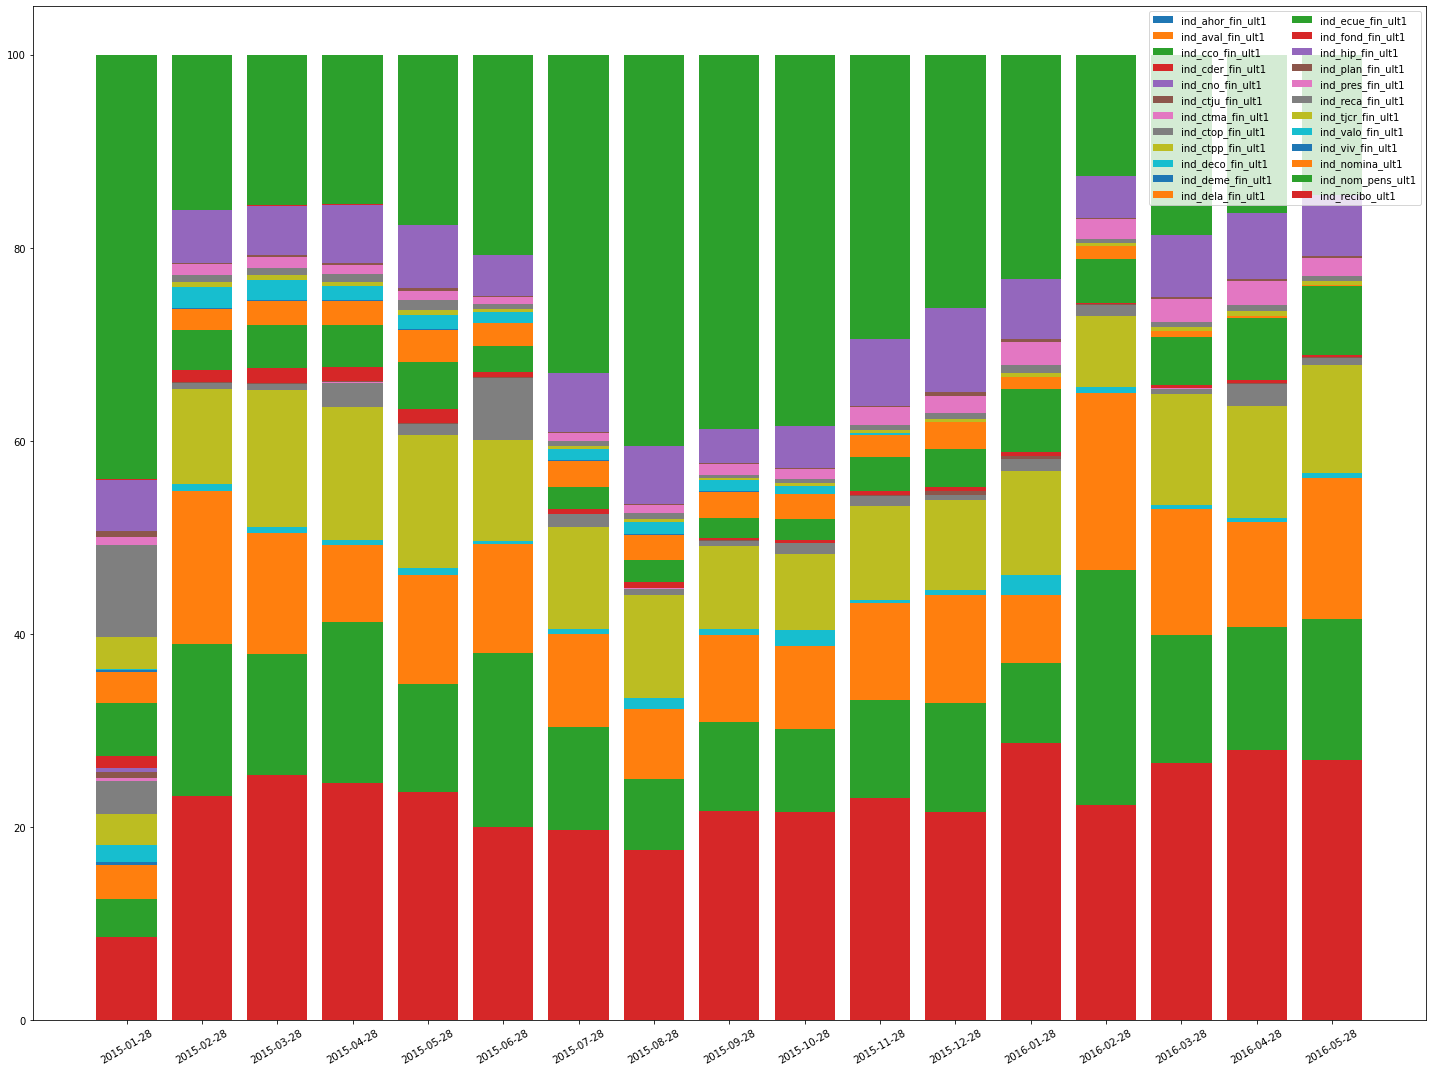

In [81]:
# 월별 상대값으로 시각화(다른달의 신규 구매 횟수를 더 자세히 보기 위하여)
total_label_over_time = label_over_time.sum(axis=0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xticks(range(len(months)))
ax.set_xticklabels(months)
ax.tick_params(axis='x', rotation=30)
for i in range(len(label_over_time)):
    ax.bar(range(len(months)), label_over_time[i:].sum(axis=0)/total_label_over_time*100, label=label_cols[i])
fig.tight_layout()
ax.legend(fontsize=10, loc='upper right', ncol=2)
plt.show()